In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as Variable

In [24]:
seasons1 = ['Spring', 'summer', 'fall', 'winter']
list(enumerate(seasons))[0][1]

'Spring'

In [19]:
list1 = [ 'abcd', 786 , 2.23, 'runoob', 70.2 ]
tinylist = [123, 'runoob']
 
print (list1)            # 输出完整列表
print (list1[0])         # 输出列表第一个元素
print (list1[1:3])       # 从第二个开始输出到第三个元素
print (list1[2:])        # 输出从第三个元素开始的所有元素
print (tinylist * 2)    # 输出两次列表
print (list1 + tinylist) # 连接列表

['abcd', 786, 2.23, 'runoob', 70.2]
abcd
[786, 2.23]
[2.23, 'runoob', 70.2]
[123, 'runoob', 123, 'runoob']
['abcd', 786, 2.23, 'runoob', 70.2, 123, 'runoob']


In [27]:
x = torch.ones(4, 3, requires_grad=True)

In [28]:
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [29]:
y = x + 2


In [30]:
print(y)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<AddBackward0>)


In [31]:
print(y.grad_fn)

In [32]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27., 27.],
        [27., 27., 27.],
        [27., 27., 27.],
        [27., 27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [34]:
x = torch.rand(3, requires_grad=True)
y= x * 2
print(y)

tensor([0.3331, 1.4331, 1.2273], grad_fn=<MulBackward0>)


In [35]:
print(y.data)

tensor([0.3331, 1.4331, 1.2273])


In [36]:
print(y.data.norm())

tensor(1.9160)


In [37]:
while y.data.norm() < 1000:
    y = y * 2

In [38]:
print(y)

tensor([ 341.0492, 1467.5371, 1256.7867], grad_fn=<MulBackward0>)


In [40]:
import torch.nn.functional as F

In [61]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # 1 input channel, 6 output channel, 5 * 5 kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pool over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # 所有维度除了 batch 维度
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)
        

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [42]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [54]:
print(params[9].size())

torch.Size([10])


In [62]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.1042, -0.0458, -0.0808,  0.1470, -0.0396,  0.0464,  0.0252,  0.0694,
         -0.0181,  0.0474]], grad_fn=<AddmmBackward>)


In [63]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [64]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

tensor(1.2358, grad_fn=<MseLossBackward>)


In [70]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions)
print(loss.grad_fn.next_functions[0][0].next_functions)

((<AddmmBackward object at 0x7fb2165b1a20>, 0),)
((<AccumulateGrad object at 0x7fb2165b13c8>, 0), (<ReluBackward0 object at 0x7fb2165b10f0>, 0), (<TBackward object at 0x7fb2165b1fd0>, 0))


In [71]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0115, -0.0305,  0.0062, -0.0214,  0.0091, -0.0356])


使用python代码定义梯度下降规则
在实践中最简单的权重更新规则是随机梯度下降（SGD）：

 ``weight = weight - learning_rate * gradient``

#### 我们可以使用简单的Python代码实现这个规则：
```
learning_rate = 0.01
for f in net.parameters():   
    f.data.sub_(f.grad.data * learning_rate)
```

In [72]:
# create your optim
optimizer = optim.SGD(net.parameters(), lr=0.01)
# in your training_loop
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # does the update


.. 注意::

  观察如何使用``optimizer.zero_grad()``手动将梯度缓冲区设置为零。
  这是因为梯度是按Backprop部分中的说明累积的。

In [76]:
for f in net.parameters():
    print(f.data)

tensor([[[[-0.0942, -0.1529,  0.1848,  0.0380, -0.1592],
          [ 0.1855,  0.0666, -0.1626,  0.0796,  0.1405],
          [-0.0009,  0.0036,  0.1374, -0.0202, -0.0663],
          [ 0.0440,  0.1739, -0.0747,  0.1015,  0.1140],
          [-0.0215, -0.1391, -0.0764,  0.1533, -0.0647]]],


        [[[-0.0315, -0.0090, -0.0762,  0.1903, -0.0154],
          [-0.0367,  0.1301,  0.0572, -0.0739,  0.1843],
          [-0.1737,  0.1447,  0.0471, -0.0583, -0.1826],
          [ 0.0250, -0.0238,  0.1243,  0.0908, -0.1225],
          [-0.0455,  0.0624, -0.1195,  0.0799,  0.1848]]],


        [[[-0.1392,  0.1114, -0.0188, -0.0182, -0.0117],
          [-0.1224, -0.0353, -0.1616,  0.1969, -0.1071],
          [-0.1584, -0.0696, -0.0539,  0.0514, -0.1820],
          [ 0.0312,  0.0318, -0.1681,  0.0557, -0.1491],
          [-0.1534,  0.0949,  0.0720,  0.0575,  0.1170]]],


        [[[ 0.0941, -0.0921,  0.1710,  0.0833, -0.0622],
          [ 0.0309,  0.0178, -0.1293,  0.0212, -0.1027],
          [ 0.0933,

In [77]:
import torchvision
import torchvision.transforms as transforms

In [78]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='/home/lds/data/', train=True, download=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='/home/lds/data/', train=False, download=True, transform=transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

0.00B [00:00, ?B/s]

100%|█████████▉| 170M/170M [00:24<00:00, 8.42MB/s]   

Files already downloaded and verified


171MB [00:40, 8.42MB/s]                           

In [79]:

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  car truck truck  bird


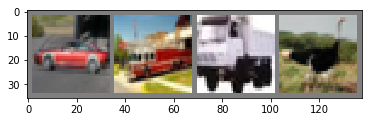

In [81]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainLoader)
imges, labels = dataiter.next()
imshow(torchvision.utils.make_grid(imges))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [82]:
trainLoader

In [84]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x= self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [86]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [88]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        # 批量输入
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 打印
        running_loss += loss.item()
        if i % 2000 == 1999: # 每两千打印一次
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
print('finished')

[1,  2000] loss: 2.285
[1,  4000] loss: 1.975
[1,  6000] loss: 1.706
[1,  8000] loss: 1.573
[1, 10000] loss: 1.507
[1, 12000] loss: 1.479
[2,  2000] loss: 1.414
[2,  4000] loss: 1.372
[2,  6000] loss: 1.347
[2,  8000] loss: 1.339
[2, 10000] loss: 1.310
[2, 12000] loss: 1.297
finished


4
GroundTruth:    cat  ship  ship plane


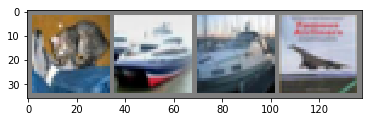

In [99]:
dataiter = iter(testLoader)
images, labels = dataiter.next()
print(labels.size(0))
# 显示图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [90]:
outputs = net(images)

In [92]:
_,predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat plane  ship  ship


In [97]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testLoader:
        outputs = net(images)
        print(labels)
        print(outputs.size())
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

tensor([3, 8, 8, 0])
torch.Size([4, 10])
tensor([6, 6, 1, 6])
torch.Size([4, 10])
tensor([3, 1, 0, 9])
torch.Size([4, 10])
tensor([5, 7, 9, 8])
torch.Size([4, 10])
tensor([5, 7, 8, 6])
torch.Size([4, 10])
tensor([7, 0, 4, 9])
torch.Size([4, 10])
tensor([5, 2, 4, 0])
torch.Size([4, 10])
tensor([9, 6, 6, 5])
torch.Size([4, 10])
tensor([4, 5, 9, 2])
torch.Size([4, 10])
tensor([4, 1, 9, 5])
torch.Size([4, 10])
tensor([4, 6, 5, 6])
torch.Size([4, 10])
tensor([0, 9, 3, 9])
torch.Size([4, 10])
tensor([7, 6, 9, 8])
torch.Size([4, 10])
tensor([0, 3, 8, 8])
torch.Size([4, 10])
tensor([7, 7, 4, 6])
torch.Size([4, 10])
tensor([7, 3, 6, 3])
torch.Size([4, 10])
tensor([6, 2, 1, 2])
torch.Size([4, 10])
tensor([3, 7, 2, 6])
torch.Size([4, 10])
tensor([8, 8, 0, 2])
torch.Size([4, 10])
tensor([9, 3, 3, 8])
torch.Size([4, 10])
tensor([8, 1, 1, 7])
torch.Size([4, 10])
tensor([2, 5, 2, 7])
torch.Size([4, 10])
tensor([8, 9, 0, 3])
torch.Size([4, 10])
tensor([8, 6, 4, 6])
torch.Size([4, 10])
tensor([6, 0, 0,

tensor([0, 0, 4, 2])
torch.Size([4, 10])
tensor([3, 2, 7, 2])
torch.Size([4, 10])
tensor([2, 5, 9, 8])
torch.Size([4, 10])
tensor([9, 1, 7, 4])
torch.Size([4, 10])
tensor([0, 3, 0, 1])
torch.Size([4, 10])
tensor([3, 8, 3, 9])
torch.Size([4, 10])
tensor([6, 1, 4, 7])
torch.Size([4, 10])
tensor([0, 3, 7, 8])
torch.Size([4, 10])
tensor([9, 1, 1, 6])
torch.Size([4, 10])
tensor([6, 6, 6, 9])
torch.Size([4, 10])
tensor([1, 9, 9, 4])
torch.Size([4, 10])
tensor([2, 1, 7, 0])
torch.Size([4, 10])
tensor([6, 8, 1, 9])
torch.Size([4, 10])
tensor([2, 9, 0, 4])
torch.Size([4, 10])
tensor([7, 8, 3, 1])
torch.Size([4, 10])
tensor([2, 0, 1, 5])
torch.Size([4, 10])
tensor([8, 4, 6, 3])
torch.Size([4, 10])
tensor([8, 1, 3, 8])
torch.Size([4, 10])
tensor([5, 0, 8, 4])
torch.Size([4, 10])
tensor([8, 1, 1, 8])
torch.Size([4, 10])
tensor([9, 6, 0, 8])
torch.Size([4, 10])
tensor([6, 1, 3, 4])
torch.Size([4, 10])
tensor([1, 6, 0, 5])
torch.Size([4, 10])
tensor([1, 1, 0, 0])
torch.Size([4, 10])
tensor([3, 5, 0,

tensor([8, 3, 5, 5])
torch.Size([4, 10])
tensor([7, 7, 8, 6])
torch.Size([4, 10])
tensor([2, 8, 2, 3])
torch.Size([4, 10])
tensor([5, 6, 8, 0])
torch.Size([4, 10])
tensor([2, 3, 7, 0])
torch.Size([4, 10])
tensor([1, 9, 1, 3])
torch.Size([4, 10])
tensor([7, 5, 8, 3])
torch.Size([4, 10])
tensor([2, 9, 6, 8])
torch.Size([4, 10])
tensor([6, 9, 3, 8])
torch.Size([4, 10])
tensor([9, 8, 0, 7])
torch.Size([4, 10])
tensor([8, 5, 0, 0])
torch.Size([4, 10])
tensor([1, 3, 9, 1])
torch.Size([4, 10])
tensor([5, 3, 4, 4])
torch.Size([4, 10])
tensor([0, 9, 9, 9])
torch.Size([4, 10])
tensor([9, 8, 2, 4])
torch.Size([4, 10])
tensor([2, 2, 5, 1])
torch.Size([4, 10])
tensor([9, 1, 0, 9])
torch.Size([4, 10])
tensor([4, 2, 1, 6])
torch.Size([4, 10])
tensor([0, 3, 7, 6])
torch.Size([4, 10])
tensor([3, 1, 8, 6])
torch.Size([4, 10])
tensor([5, 7, 2, 8])
torch.Size([4, 10])
tensor([4, 4, 8, 3])
torch.Size([4, 10])
tensor([5, 0, 5, 7])
torch.Size([4, 10])
tensor([4, 4, 2, 2])
torch.Size([4, 10])
tensor([7, 3, 6,

tensor([0, 8, 3, 6])
torch.Size([4, 10])
tensor([4, 6, 7, 5])
torch.Size([4, 10])
tensor([1, 8, 9, 0])
torch.Size([4, 10])
tensor([5, 0, 5, 4])
torch.Size([4, 10])
tensor([3, 8, 5, 2])
torch.Size([4, 10])
tensor([0, 8, 5, 9])
torch.Size([4, 10])
tensor([2, 5, 6, 5])
torch.Size([4, 10])
tensor([7, 3, 7, 2])
torch.Size([4, 10])
tensor([8, 8, 4, 2])
torch.Size([4, 10])
tensor([1, 6, 2, 9])
torch.Size([4, 10])
tensor([9, 8, 2, 3])
torch.Size([4, 10])
tensor([1, 0, 5, 2])
torch.Size([4, 10])
tensor([3, 7, 9, 5])
torch.Size([4, 10])
tensor([9, 1, 1, 3])
torch.Size([4, 10])
tensor([2, 7, 4, 4])
torch.Size([4, 10])
tensor([1, 9, 4, 5])
torch.Size([4, 10])
tensor([5, 2, 7, 7])
torch.Size([4, 10])
tensor([6, 1, 2, 3])
torch.Size([4, 10])
tensor([7, 5, 4, 3])
torch.Size([4, 10])
tensor([7, 7, 0, 0])
torch.Size([4, 10])
tensor([1, 4, 4, 3])
torch.Size([4, 10])
tensor([7, 9, 8, 7])
torch.Size([4, 10])
tensor([0, 9, 0, 3])
torch.Size([4, 10])
tensor([7, 6, 3, 8])
torch.Size([4, 10])
tensor([4, 5, 6,

tensor([9, 1, 5, 8])
torch.Size([4, 10])
tensor([1, 8, 2, 4])
torch.Size([4, 10])
tensor([5, 2, 4, 1])
torch.Size([4, 10])
tensor([1, 6, 6, 8])
torch.Size([4, 10])
tensor([5, 2, 2, 5])
torch.Size([4, 10])
tensor([0, 8, 2, 3])
torch.Size([4, 10])
tensor([6, 2, 9, 6])
torch.Size([4, 10])
tensor([1, 4, 5, 9])
torch.Size([4, 10])
tensor([0, 1, 0, 0])
torch.Size([4, 10])
tensor([8, 1, 1, 6])
torch.Size([4, 10])
tensor([6, 9, 5, 4])
torch.Size([4, 10])
tensor([1, 7, 8, 6])
torch.Size([4, 10])
tensor([9, 1, 7, 6])
torch.Size([4, 10])
tensor([0, 9, 3, 5])
torch.Size([4, 10])
tensor([3, 2, 5, 3])
torch.Size([4, 10])
tensor([4, 9, 7, 1])
torch.Size([4, 10])
tensor([4, 4, 6, 1])
torch.Size([4, 10])
tensor([3, 8, 8, 0])
torch.Size([4, 10])
tensor([6, 7, 7, 6])
torch.Size([4, 10])
tensor([7, 2, 3, 2])
torch.Size([4, 10])
tensor([2, 6, 2, 7])
torch.Size([4, 10])
tensor([4, 0, 3, 6])
torch.Size([4, 10])
tensor([2, 6, 3, 3])
torch.Size([4, 10])
tensor([0, 9, 5, 1])
torch.Size([4, 10])
tensor([1, 5, 3,

tensor([7, 5, 2, 3])
torch.Size([4, 10])
tensor([4, 1, 2, 9])
torch.Size([4, 10])
tensor([2, 1, 3, 4])
torch.Size([4, 10])
tensor([8, 9, 0, 0])
torch.Size([4, 10])
tensor([4, 9, 0, 2])
torch.Size([4, 10])
tensor([2, 0, 6, 8])
torch.Size([4, 10])
tensor([7, 3, 3, 8])
torch.Size([4, 10])
tensor([9, 0, 2, 5])
torch.Size([4, 10])
tensor([3, 6, 1, 3])
torch.Size([4, 10])
tensor([9, 5, 0, 5])
torch.Size([4, 10])
tensor([4, 4, 0, 1])
torch.Size([4, 10])
tensor([1, 6, 1, 7])
torch.Size([4, 10])
tensor([9, 9, 6, 2])
torch.Size([4, 10])
tensor([4, 3, 8, 3])
torch.Size([4, 10])
tensor([4, 7, 0, 2])
torch.Size([4, 10])
tensor([8, 4, 8, 3])
torch.Size([4, 10])
tensor([8, 8, 8, 3])
torch.Size([4, 10])
tensor([3, 5, 7, 7])
torch.Size([4, 10])
tensor([0, 4, 1, 5])
torch.Size([4, 10])
tensor([9, 7, 0, 6])
torch.Size([4, 10])
tensor([8, 4, 9, 0])
torch.Size([4, 10])
tensor([1, 8, 9, 6])
torch.Size([4, 10])
tensor([3, 9, 2, 4])
torch.Size([4, 10])
tensor([4, 0, 3, 3])
torch.Size([4, 10])
tensor([5, 4, 5,

tensor([9, 8, 7, 5])
torch.Size([4, 10])
tensor([4, 0, 9, 0])
torch.Size([4, 10])
tensor([0, 8, 2, 0])
torch.Size([4, 10])
tensor([0, 2, 4, 8])
torch.Size([4, 10])
tensor([6, 2, 4, 6])
torch.Size([4, 10])
tensor([3, 5, 1, 5])
torch.Size([4, 10])
tensor([3, 7, 2, 2])
torch.Size([4, 10])
tensor([9, 8, 0, 0])
torch.Size([4, 10])
tensor([0, 3, 4, 4])
torch.Size([4, 10])
tensor([6, 1, 6, 7])
torch.Size([4, 10])
tensor([4, 4, 3, 9])
torch.Size([4, 10])
tensor([4, 0, 8, 0])
torch.Size([4, 10])
tensor([4, 6, 5, 7])
torch.Size([4, 10])
tensor([9, 7, 0, 5])
torch.Size([4, 10])
tensor([7, 7, 3, 1])
torch.Size([4, 10])
tensor([9, 3, 0, 9])
torch.Size([4, 10])
tensor([5, 3, 7, 9])
torch.Size([4, 10])
tensor([4, 4, 1, 7])
torch.Size([4, 10])
tensor([7, 1, 4, 1])
torch.Size([4, 10])
tensor([2, 8, 7, 0])
torch.Size([4, 10])
tensor([0, 4, 7, 2])
torch.Size([4, 10])
tensor([9, 7, 6, 9])
torch.Size([4, 10])
tensor([3, 5, 8, 0])
torch.Size([4, 10])
tensor([3, 6, 8, 3])
torch.Size([4, 10])
tensor([2, 4, 7,

tensor([5, 0, 8, 7])
torch.Size([4, 10])
tensor([5, 2, 4, 3])
torch.Size([4, 10])
tensor([7, 0, 2, 3])
torch.Size([4, 10])
tensor([1, 0, 0, 2])
torch.Size([4, 10])
tensor([1, 2, 1, 4])
torch.Size([4, 10])
tensor([6, 7, 1, 0])
torch.Size([4, 10])
tensor([5, 2, 5, 9])
torch.Size([4, 10])
tensor([2, 5, 6, 7])
torch.Size([4, 10])
tensor([1, 9, 3, 6])
torch.Size([4, 10])
tensor([1, 0, 2, 9])
torch.Size([4, 10])
tensor([4, 2, 9, 3])
torch.Size([4, 10])
tensor([8, 2, 9, 8])
torch.Size([4, 10])
tensor([5, 1, 0, 1])
torch.Size([4, 10])
tensor([5, 2, 5, 6])
torch.Size([4, 10])
tensor([8, 8, 3, 5])
torch.Size([4, 10])
tensor([0, 4, 1, 3])
torch.Size([4, 10])
tensor([7, 0, 3, 3])
torch.Size([4, 10])
tensor([9, 2, 3, 9])
torch.Size([4, 10])
tensor([9, 8, 5, 9])
torch.Size([4, 10])
tensor([7, 2, 0, 9])
torch.Size([4, 10])
tensor([4, 7, 1, 7])
torch.Size([4, 10])
tensor([6, 4, 4, 8])
torch.Size([4, 10])
tensor([9, 0, 7, 1])
torch.Size([4, 10])
tensor([2, 4, 0, 3])
torch.Size([4, 10])
tensor([7, 5, 1,

tensor([9, 5, 7, 9])
torch.Size([4, 10])
tensor([0, 3, 6, 5])
torch.Size([4, 10])
tensor([7, 0, 5, 1])
torch.Size([4, 10])
tensor([2, 2, 9, 7])
torch.Size([4, 10])
tensor([0, 0, 1, 4])
torch.Size([4, 10])
tensor([4, 5, 5, 9])
torch.Size([4, 10])
tensor([6, 3, 6, 2])
torch.Size([4, 10])
tensor([6, 9, 3, 2])
torch.Size([4, 10])
tensor([3, 2, 4, 9])
torch.Size([4, 10])
tensor([5, 2, 1, 6])
torch.Size([4, 10])
tensor([6, 4, 7, 6])
torch.Size([4, 10])
tensor([3, 3, 8, 1])
torch.Size([4, 10])
tensor([4, 6, 4, 4])
torch.Size([4, 10])
tensor([5, 6, 2, 0])
torch.Size([4, 10])
tensor([5, 2, 7, 5])
torch.Size([4, 10])
tensor([2, 5, 2, 5])
torch.Size([4, 10])
tensor([9, 0, 6, 7])
torch.Size([4, 10])
tensor([9, 8, 3, 2])
torch.Size([4, 10])
tensor([1, 4, 3, 4])
torch.Size([4, 10])
tensor([5, 5, 6, 8])
torch.Size([4, 10])
tensor([6, 0, 8, 9])
torch.Size([4, 10])
tensor([8, 0, 7, 7])
torch.Size([4, 10])
tensor([6, 6, 7, 5])
torch.Size([4, 10])
tensor([9, 8, 7, 9])
torch.Size([4, 10])
tensor([5, 6, 0,

tensor([3, 0, 2, 9])
torch.Size([4, 10])
tensor([4, 5, 0, 3])
torch.Size([4, 10])
tensor([4, 7, 2, 3])
torch.Size([4, 10])
tensor([0, 1, 3, 7])
torch.Size([4, 10])
tensor([9, 9, 0, 7])
torch.Size([4, 10])
tensor([5, 6, 7, 1])
torch.Size([4, 10])
tensor([2, 2, 7, 4])
torch.Size([4, 10])
tensor([6, 8, 4, 9])
torch.Size([4, 10])
tensor([8, 4, 9, 2])
torch.Size([4, 10])
tensor([3, 4, 0, 2])
torch.Size([4, 10])
tensor([5, 6, 0, 5])
torch.Size([4, 10])
tensor([3, 5, 8, 3])
torch.Size([4, 10])
tensor([7, 4, 9, 5])
torch.Size([4, 10])
tensor([6, 3, 8, 6])
torch.Size([4, 10])
tensor([9, 8, 5, 5])
torch.Size([4, 10])
tensor([8, 3, 5, 9])
torch.Size([4, 10])
tensor([0, 4, 2, 0])
torch.Size([4, 10])
tensor([5, 9, 9, 3])
torch.Size([4, 10])
tensor([8, 0, 6, 0])
torch.Size([4, 10])
tensor([2, 3, 7, 0])
torch.Size([4, 10])
tensor([0, 6, 9, 1])
torch.Size([4, 10])
tensor([5, 2, 2, 7])
torch.Size([4, 10])
tensor([9, 3, 9, 3])
torch.Size([4, 10])
tensor([5, 2, 2, 2])
torch.Size([4, 10])
tensor([8, 8, 5,

tensor([3, 8, 0, 4])
torch.Size([4, 10])
tensor([8, 6, 7, 2])
torch.Size([4, 10])
tensor([7, 1, 7, 4])
torch.Size([4, 10])
tensor([1, 2, 4, 2])
torch.Size([4, 10])
tensor([2, 8, 7, 2])
torch.Size([4, 10])
tensor([2, 6, 7, 5])
torch.Size([4, 10])
tensor([6, 8, 9, 9])
torch.Size([4, 10])
tensor([6, 5, 2, 9])
torch.Size([4, 10])
tensor([8, 7, 2, 3])
torch.Size([4, 10])
tensor([3, 7, 4, 3])
torch.Size([4, 10])
tensor([2, 1, 9, 0])
torch.Size([4, 10])
tensor([1, 5, 3, 2])
torch.Size([4, 10])
tensor([6, 5, 9, 1])
torch.Size([4, 10])
tensor([5, 4, 3, 6])
torch.Size([4, 10])
tensor([2, 8, 9, 7])
torch.Size([4, 10])
tensor([8, 0, 8, 9])
torch.Size([4, 10])
tensor([1, 2, 5, 7])
torch.Size([4, 10])
tensor([2, 0, 6, 6])
torch.Size([4, 10])
tensor([1, 6, 3, 1])
torch.Size([4, 10])
tensor([5, 0, 3, 7])
torch.Size([4, 10])
tensor([4, 6, 5, 6])
torch.Size([4, 10])
tensor([4, 8, 3, 4])
torch.Size([4, 10])
tensor([5, 5, 0, 6])
torch.Size([4, 10])
tensor([6, 7, 5, 0])
torch.Size([4, 10])
tensor([9, 9, 6,

torch.Size([4, 10])
tensor([3, 4, 5, 7])
torch.Size([4, 10])
tensor([1, 5, 0, 1])
torch.Size([4, 10])
tensor([1, 1, 9, 7])
torch.Size([4, 10])
tensor([5, 4, 9, 7])
torch.Size([4, 10])
tensor([8, 1, 0, 2])
torch.Size([4, 10])
tensor([8, 5, 6, 7])
torch.Size([4, 10])
tensor([0, 1, 4, 8])
torch.Size([4, 10])
tensor([4, 4, 6, 6])
torch.Size([4, 10])
tensor([5, 8, 1, 8])
torch.Size([4, 10])
tensor([4, 6, 5, 9])
torch.Size([4, 10])
tensor([2, 2, 1, 4])
torch.Size([4, 10])
tensor([9, 1, 6, 7])
torch.Size([4, 10])
tensor([2, 0, 1, 7])
torch.Size([4, 10])
tensor([6, 5, 2, 2])
torch.Size([4, 10])
tensor([5, 6, 0, 9])
torch.Size([4, 10])
tensor([0, 1, 5, 3])
torch.Size([4, 10])
tensor([3, 5, 8, 7])
torch.Size([4, 10])
tensor([5, 6, 5, 8])
torch.Size([4, 10])
tensor([0, 5, 9, 4])
torch.Size([4, 10])
tensor([6, 5, 1, 1])
torch.Size([4, 10])
tensor([0, 3, 3, 9])
torch.Size([4, 10])
tensor([4, 8, 1, 7])
torch.Size([4, 10])
tensor([7, 9, 9, 4])
torch.Size([4, 10])
tensor([3, 6, 3, 2])
torch.Size([4, 1

In [96]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
print(class_correct)
print(class_total)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [104]:
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        print('c' , c)
        for i in range(4):
            label = labels[i]
            print('ci' ,c[i])
            print('item:' , c[i].item())
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8

c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8

c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8

ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=tor

c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

c tensor([1, 1, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8

c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8

c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8

c tensor([0, 0, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8

c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 1], dtype=tor

ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8

c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8

ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8

ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=tor

ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8

c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8

c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8

c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8

c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8

c tensor([1, 0, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8

ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8

ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8

ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8

c tensor([0, 0, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8

ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8

item: 1
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=tor

c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8

c tensor([0, 1, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8

c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8

ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8

item: 0
c tensor([1, 0, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 0, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 1, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=tor

ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 1, 0, 1], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([1, 0, 1, 0], dtype=torch.uint8)
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 1, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([1, 0, 1, 1], dtype=tor

ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 0, 1, 1], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(1, dtype=torch.uint8)
item: 1
c tensor([0, 1, 0, 0], dtype=torch.uint8)
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(1, dtype=torch.uint8)
item: 1
ci tensor(0, dtype=torch.uint8)
item: 0
ci tensor(0, dtype=torch.uint8)
item: 0
c tensor([0, 1, 0, 0], dtype=tor

In [109]:
x = torch.randn(5, 5, requires_grad=True)

In [110]:
y = torch.randn(5, 5, requires_grad=True)

z = x ** 2 + y ** 2

In [111]:
torch.ones_like(x)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [112]:
z.backward(torch.ones_like(x))

In [113]:
print(z)

tensor([[0.2520, 2.8642, 3.6871, 0.9505, 2.4400],
        [3.2601, 2.2963, 2.3320, 0.3389, 0.0443],
        [2.9706, 2.9580, 1.5731, 1.4267, 1.7248],
        [1.0674, 3.4275, 0.8752, 0.9444, 0.3037],
        [0.3089, 3.1367, 0.7101, 6.2978, 0.4604]], grad_fn=<AddBackward0>)


In [114]:
# 定义一个乘以常数的操作（输入参数是张量)
# 方法必须是静态方法，所以要加@staticmethod
from torch.autograd.function import Function
class MulConstant(Function):
    @staticmethod
    def forward(ctx, tensor, constant):
        # ctx用来保存信息这里类似self，并且ctx的属性可以在backward中调用
        ctx.constant = constant
        return tensor * constant
    
    @staticmethod
    def backward(ctx, grad_output):
        # 返回的参数与输入的参数一样
        # 第一个输入为3x3的张量，第二个为常数
        # 常数的梯度必须是None
        return grad_output, None

In [117]:
a = torch.rand(3, 3, requires_grad=True)
b = MulConstant.apply(a, 5)
print(a)
print(b) # b为a的元素乘以5

tensor([[0.1886, 0.2430, 0.3713],
        [0.3614, 0.4923, 0.7339],
        [0.9021, 0.2601, 0.3535]], requires_grad=True)
tensor([[0.9431, 1.2150, 1.8564],
        [1.8070, 2.4617, 3.6696],
        [4.5107, 1.3004, 1.7676]], grad_fn=<MulConstantBackward>)


In [118]:
b.backward(torch.ones_like(a))

In [119]:
a.grad

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])